## IMPORTING LIBRARIES
 we are using tensorflow for this

In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU only

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

## LOADING DATASET (iris datase)

In [25]:
iris = load_iris()

x = iris.data
y = iris.target


### preprocessing data 

using pandas to understand the dataset

In [26]:
import pandas as pd

# 2. Create the DataFrame using the data and feature names
iris_df = pd.DataFrame(data=x, columns=iris.feature_names)

# 3. Add the target variable (species) to the DataFrame
iris_df['species_target'] = y
iris_df['species_name'] = iris.target_names[y]

iris_df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species_target        3
species_name          3
dtype: int64

there is : 4 inputs , 3 outputs 

and doing stuff to stop the model from overfitting (belive me it was overfitting super bad)

In [27]:
#splitting the data into testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

scaling features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

## MAKING THE NEURAL NETWORK

In [29]:
#defining model with regularization and dropout
model = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(8, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

#compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, epochs=100, batch_size=8, 
          validation_data=(x_val, y_val),
          callbacks=[early_stop],
          verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2889 - loss: 1.2338 - val_accuracy: 0.4000 - val_loss: 1.1595
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3556 - loss: 1.2219 - val_accuracy: 0.5667 - val_loss: 1.1325
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4222 - loss: 1.1900 - val_accuracy: 0.7000 - val_loss: 1.1141
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4111 - loss: 1.1816 - val_accuracy: 0.7333 - val_loss: 1.0986
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4444 - loss: 1.1554 - val_accuracy: 0.7333 - val_loss: 1.0851
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4111 - loss: 1.1674 - val_accuracy: 0.7000 - val_loss: 1.0694
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5222 - loss: 1.1160 - val_accuracy: 0.6667 - val_loss: 1.0544
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4222 - loss: 1.1415 - val_accuracy: 0.

## Visualization :

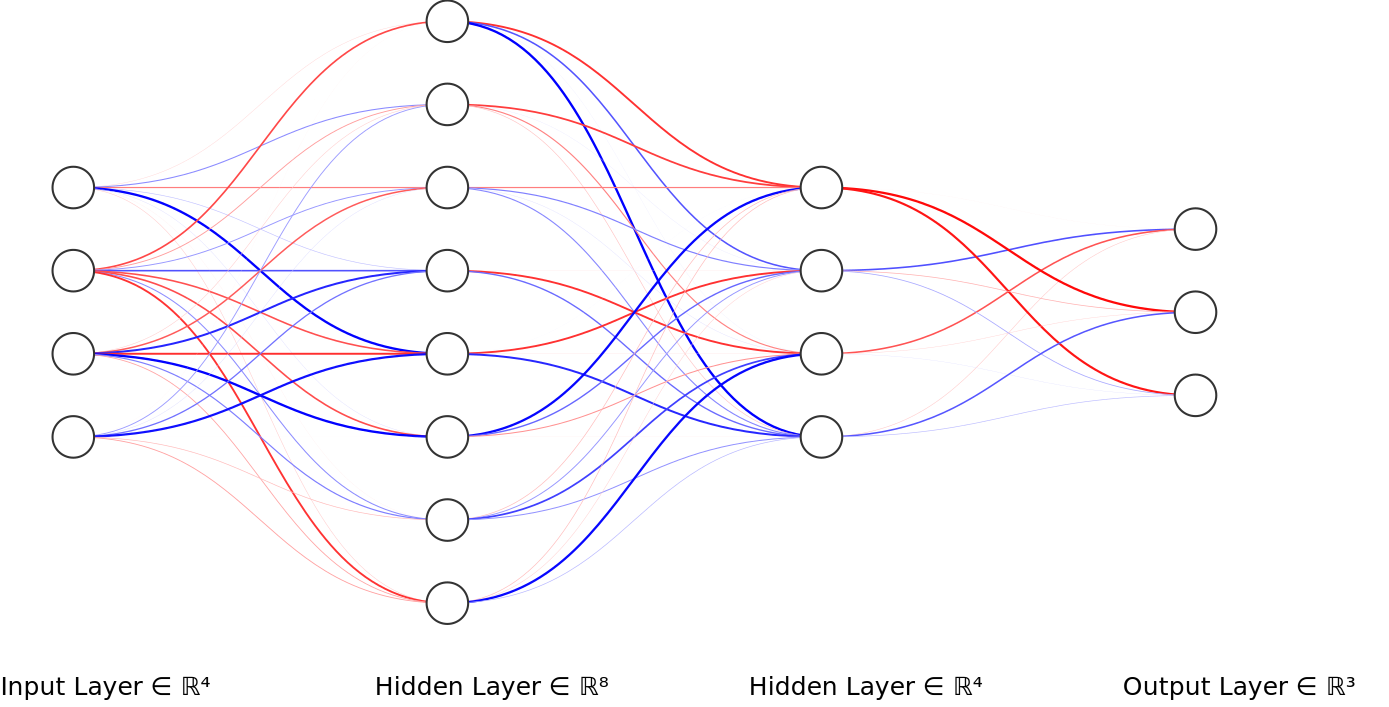

In [31]:
from IPython.display import SVG, display

# Replace 'nn.svg' with the full path if it's in a different folder
display(SVG(filename='NN.svg'))

# ACCURACY AND CONCLUSION

In [32]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_predval = np.argmax(model.predict(x_val),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [33]:
from sklearn.metrics import accuracy_score,f1_score

acc = accuracy_score(y_test, y_pred)
accval = accuracy_score(y_val, y_predval)  # Fixed: use y_val instead of y_test

print("Test Accuracy = ", acc)
print("Validation Accuracy = ", accval)

Test Accuracy =  0.9666666666666667
Validation Accuracy =  0.9


### Explanation of the Learning Process

During **forward propagation**, the input data passes through the input layer and then through the hidden layers, where each neuron computes a weighted sum of its inputs, applies an activation function (like ReLU), and passes the result to the next layer until the output is produced.

The **error** is computed by comparing the predicted output with the true target values using a loss function such as cross-entropy or mean squared error. This loss measures how far the model’s predictions are from the actual labels.

During **backpropagation**, the network calculates the gradient of the loss with respect to each weight by applying the chain rule, starting from the output layer and moving backward through the hidden layers. This tells the network how much each weight contributed to the error.

The **weights are updated** using an optimizer like SGD or Adam, which adjusts them slightly in the direction that reduces the loss. Over many training epochs, these updates gradually minimize the error and improve the model’s performance.